#  Gender Classification using CNN Transfer Learning on Kaggle Dataset

#### Group ELU (S12):
#### - ESQUIVEL, Vince Anthony
#### - LIM, Mark Willbur
#### - UY, Justin Riley

 ### Introduction

The main objective of this notebook is to see how CNN Transfer Learning is used together along with a gender classification dataset to create a deep learning model that can reliably predict the correct data. We will utilizing a Kaggle Dataset containing 58,000~ cropped male and female images in total separated by its training and validation sets. 

Dataset source: https://www.kaggle.com/datasets/cashutosh/gender-classification-dataset\n"

We will utilize the Keras package to create our CNN Transfer Learning Model and train it using our Gender Classification Dataset.
  
You can read and find out more about Keras through its documentation here: https://keras.io/about/
  
Lastly, we will compare the data from three (3) pre-trained CNN models and its performance after being trained and validated on our Gender Classification Dataset.

### Requirements from Rubric (dont delete muna)

An overview or description of the data is provided, including how it was collected, and its implications on the types of conclusions that could be made from the data. A description of the variables, observations, and/or structure of the data is provided. The target task is well introduced and clearly defined.

The data is sufficiently explored to get a grasp of the distribution and the content of the data. Appropriate summaries and visualizations are presented. Insights into how the EDA can help the model training is mentioned.

The necessary steps for preprocessing and cleaning are performed, including explanations for every step. If no preprocessing or cleaning is done, there is a justification on why it was not needed.

The appropriate models are used to accomplish the machine learning task. Justification of choosing the models is shown.

Appropriate data-driven error analysis is made, and changes to the model selection and hyperparameters are performed to improve model performance. The study exhausts improvements that can be done to the model

The study is concluded by effectively summarizing the efforts of the authors. Recommendations on how the model could be further improved are provided.

### About the Dataset

The Gender Classification Dataset is taken from Kaggle.com which could be found [here.]( https://www.kaggle.com/datasets/cashutosh/gender-classification-dataset) There is no specified source for the data but upon further inspection it could be assumed that the images were taken from the internet and cropped to a specific dimension for all images to follow.
    
The dataset contains the following data: 
   
1.) **Test Set**  
- 23766 male images  
- 23243 female images  
2.) **Validation Set**
- 5808 male images  
- 5841 female images 

All the images come in **.png** format and come in slightly different dimensions but are measured roughly at around 80 x 100 pixels.

### Importing Required Libraries
The most important package required for this notebook is Keras which we will use to form our models. Keras will also provide the pre-trained models we will utilize for the transfer learning portion of our CNN model.

In [21]:
import numpy as np
import cv2
import PIL
import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

Read 23766 images from the training male set.
Read with 23243 images from the training female set.
Read with 5808 images from the validation male set.
Read with 5841 images from the validation female set.
090544.jpg.jpg


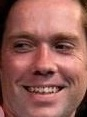

131422.jpg.jpg


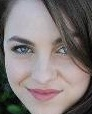

063429.jpg.jpg


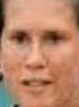

112944.jpg.jpg


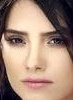

090545.jpg.jpg


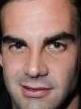

131423.jpg.jpg


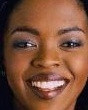

063430.jpg.jpg


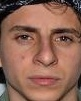

112950.jpg.jpg


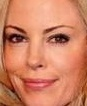

090548.jpg.jpg


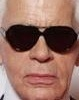

131425.jpg.jpg


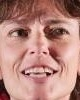

063438.jpg.jpg


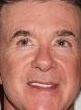

112953.jpg.jpg


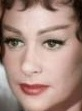

In [2]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis

tm_path = './train/male'
tf_path = './train/female'
vm_path = './valid/male'
vf_path = './valid/female'

male_train = [f for f in os.listdir(tm_path) if os.path.isfile(os.path.join(tm_path, f))]
print("Read {0} images from the training male set.".format(len(male_train)))

female_train = [f for f in os.listdir(tf_path) if os.path.isfile(os.path.join(tf_path, f))]
print("Read with {0} images from the training female set.".format(len(female_train)))

male_valid = [f for f in os.listdir(vm_path) if os.path.isfile(os.path.join(vm_path, f))]
print("Read with {0} images from the validation male set.".format(len(male_valid)))

female_valid = [f for f in os.listdir(vf_path) if os.path.isfile(os.path.join(vf_path, f))]
print("Read with {0} images from the validation female set.".format(len(female_valid)))

for i in range(3):
    print(male_train[i])
    display(_Imgdis(filename=tm_path + "/" + male_train[i], width=240, height=240))
    print(female_train[i])
    display(_Imgdis(filename=tf_path + "/" + female_train[i], width=240, height=240))
    print(male_valid[i])
    display(_Imgdis(filename=vm_path + "/" + male_valid[i], width=240, height=240))
    print(female_valid[i])
    display(_Imgdis(filename=vf_path + "/" + female_valid[i], width=240, height=240))

### Preprocessing and Cleaning our Dataset
Upon discussing on our dataset and our model, we decided that **no data cleaning or preprocessing would be required** as the CNN model **does not require** images to have the same size therefore there is no need to set a specific width and height for the dimensions of all images.

### Data Visualization

In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch 

## Using VGG16 Model

In [39]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
IMAGE_SIZE = [249, 249]
TARGET_SIZE = (249, 249)
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in vgg16.layers:
  layer.trainable = False


In [40]:
from glob import glob
from keras.models import Model
from keras.layers import Input, Lambda, Dense, Flatten
folders = glob('./train/**')

print(len(folders))

x = Flatten()(vgg16.output)
prediction = Dense(len(folders), activation='sigmoid')(x)
model_vgg16 = Model(inputs=vgg16.input, outputs=prediction)
model_vgg16.summary()

from keras import optimizers


adam = optimizers.Adam()
model_vgg16.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])


2
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 249, 249, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 249, 249, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 249, 249, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 124, 124, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 124, 124, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 124, 124, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0 

In [42]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_set_vgg16 = train_datagen.flow_from_directory('./train',
                                                 target_size = TARGET_SIZE,
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

valid_set_vgg16 = test_datagen.flow_from_directory('./valid',
                                            target_size = TARGET_SIZE,
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [44]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history = model_vgg16.fit(
  train_set_vgg16,
  validation_data=valid_set_vgg16,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/10


KeyboardInterrupt: 

In [33]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

NameError: name 'model_history' is not defined

# Using Keras Xception Model

In [34]:
train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   width_shift_range=0.4,
                                   height_shift_range=0.4,
                                   zoom_range=0.3,
                                   rotation_range=20,
                                   rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory('./train',
                                                 target_size = (249, 249),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

valid_set = test_datagen.flow_from_directory('./valid',
                                            target_size = (249, 249),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [35]:
model_xception1 = Sequential()
model_xception1.add(Xception(include_top=False, pooling='avg', weights='imagenet', input_shape=TARGET_SIZE)
model_xception1.add(Flatten())
model_xception1.add(BatchNormalization())

model_xception1.add(Dense(2048, activation='relu'))
model_xception1.add(BatchNormalization())
model_xception1.add(Dense(1024, activation='relu'))
model_xception1.add(BatchNormalization())

model_xception1.add(Dense(1, activation='sigmoid'))

model_xception1.layers[0].trainable = False

In [36]:
model_xception1.summary()
model_xception1.compile(optimizer= 'Adam', loss = 'binary_crossentropy', metrics= 'accuracy')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 batch_normalization_18 (Bat  (None, 2048)             8192      
 chNormalization)                                                
                                                                 
 dense_8 (Dense)             (None, 2048)              4196352   
                                                                 
 batch_normalization_19 (Bat  (None, 2048)             8192      
 chNormalization)                                                
                                                                 
 dense_9 (Dense)             (None, 1024)             

In [37]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
                                             save_best_only = True,
                                             monitor= 'val_accuracy',
                                             mode = 'max')

In [ ]:
epochs = 10
batch_size=256
history1 = model_xception1.fit(train_set, epochs= epochs, validation_data= valid_set,
                    steps_per_epoch= len(train_set.filenames)//batch_size,
                    validation_steps= len(valid_set.filenames)//batch_size,
                    callbacks= [checkpoint]
                    )

Epoch 1/10
 75/183 [===========>..................] - ETA: 1:04 - loss: 0.8650 - accuracy: 0.7458

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('CNN Model loss values')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show() 

In [ ]:
test_loss, test_acc = model.evaluate(valid_set, steps=50)
print('test acc:', test_acc)
print('test_loss:',test_loss)

# Second Test Using Keras Xception Model

In [ ]:
train_datagen = ImageDataGenerator(rescale= 1./255,
                                    rotation_range=30,
                                    shear_range=0.3,
                                    zoom_range=0.3,
                                    horizontal_flip=True,
                                   )
train_set = train_datagen.flow_from_directory('./train',
                                                 target_size = (249, 249),
                                                 batch_size = 64,
                                                 class_mode = 'binary'
                                             )

vaild_datagen= ImageDataGenerator(rescale=1./255)
valid_set = vaild_datagen.flow_from_directory('./valid',
                                                 target_size = (249, 249),
                                                 batch_size = 64,
                                                 class_mode = 'binary')


In [ ]:
model_xception2 = Sequential()
model_xception2.add(Xception(include_top=False, pooling='avg', weights='imagenet', input_shape=target_size))
model_xception2.add(Flatten())
model_xception2.add(BatchNormalization())

model_xception2.add(Dense(2048, activation='relu'))
model_xception2.add(BatchNormalization())
model_xception2.add(Dense(1024, activation='relu'))
model_xception2.add(BatchNormalization())

model_xception2.add(Dense(1, activation='sigmoid'))

model_xception2.layers[0].trainable = False

In [ ]:
model_xception2.summary()
model_xception2.compile(optimizer= 'Adam', loss = 'binary_crossentropy', metrics= 'accuracy')

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('xception_v2_{epoch:02d}_{val_accuracy:.3f}.h5',
                                             save_best_only = True,
                                             monitor= 'val_accuracy',
                                             mode = 'max')

In [ ]:
epochs = 10 
batch_size=512
history2 = model_xception2.fit(train_set, epochs = epochs, validation_data = valid_set,
                    steps_per_epoch= len(train_set.filenames)//batch_size,
                    validation_steps= len(valid_set.filenames)//batch_size,
                    callbacks= [checkpoint]
                    )

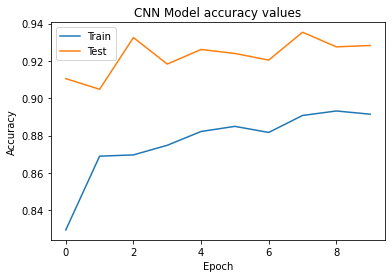

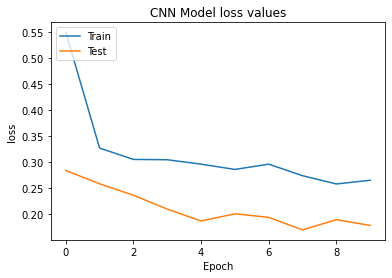

In [24]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('CNN Model loss values')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Using VGG19 Model

In [36]:
from keras.applications.vgg19 import VGG19

IMAGE_SIZE = [249, 249]
TARGET_SIZE = (249, 249)
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in vgg19.layers:
  layer.trainable = False

In [37]:
folders = glob('./train/**')
print(len(folders))

x = Flatten()(vgg19.output)
prediction = Dense(len(folders), activation='sigmoid')(x)
model_vgg19 = Model(inputs=vgg19.input, outputs=prediction)
model_vgg19.summary()

from keras import optimizers

adam = optimizers.Adam()
model_vgg19.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])


2
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 249, 249, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 249, 249, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 249, 249, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 124, 124, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 124, 124, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 124, 124, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0 

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_set_vgg19 = train_datagen.flow_from_directory('./train',
                                                 target_size = TARGET_SIZE,
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

valid_set_vgg19 = test_datagen.flow_from_directory('./valid',
                                            target_size = TARGET_SIZE,
                                            batch_size = 32,
                                            class_mode = 'categorical')

In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='vgg19.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model_vgg19.fit_generator(
  train_set_vgg19,
  validation_data=valid_set_vgg19,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)